# Importing Data

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# List Files in Directory
files = sorted(os.listdir())

# Create pandas DataFrame
df = pd.DataFrame()

# Merging all data
for i in range(len(files)-2):
  dataset = pd.read_csv(f"{files[i+2]}")
  df = pd.concat([df, dataset])

In [ ]:
df.head(5)

""


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [ ]:
df.describe().round(2)

ValueError: ignored

In [ ]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,1946583,object,157673223
1,rideable_type,3,object,150319604
2,started_at,1891669,object,163512972
3,ended_at,1893030,object,163512972
4,start_station_name,301,object,164960156
5,start_station_id,303,object,136259042
6,end_station_name,585,object,164751061
7,end_station_id,584,object,136041541
8,start_lat,117337,float64,31145328
9,start_lng,123844,float64,31145328


In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [ ]:
cols = ['rideable_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual']
for col in cols:
    df[col] = df[col].astype('category')

In [ ]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,1946583,object,157673223
1,rideable_type,3,category,17519562
2,started_at,1891669,datetime64[ns],31145328
3,ended_at,1893030,datetime64[ns],31145328
4,start_station_name,301,category,19497056
5,start_station_id,303,category,19493339
6,end_station_name,585,category,19527286
7,end_station_id,584,category,19519580
8,start_lat,117337,float64,31145328
9,start_lng,123844,float64,31145328


# Exploring the Data

In [ ]:
df['start_hour']=df['started_at'].dt.hour.astype('category')
df['start_day']=df['started_at'].dt.day.astype('category')
df['weekday']=df['started_at'].dt.weekday.astype('category')

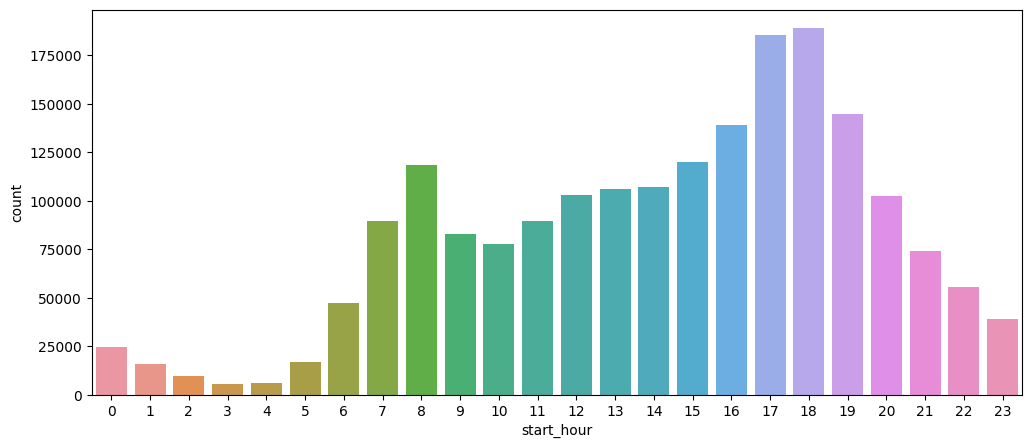

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="start_hour");

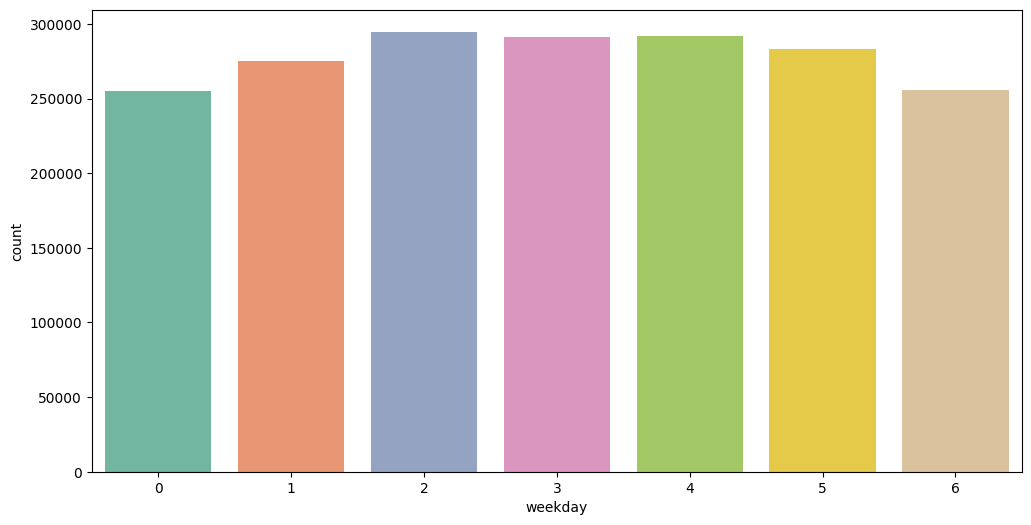

In [ ]:
plt.figure(figsize=(12,6))
sns.set_palette("Set2")
sns.countplot(data=df,x="weekday", dodge=False) ;

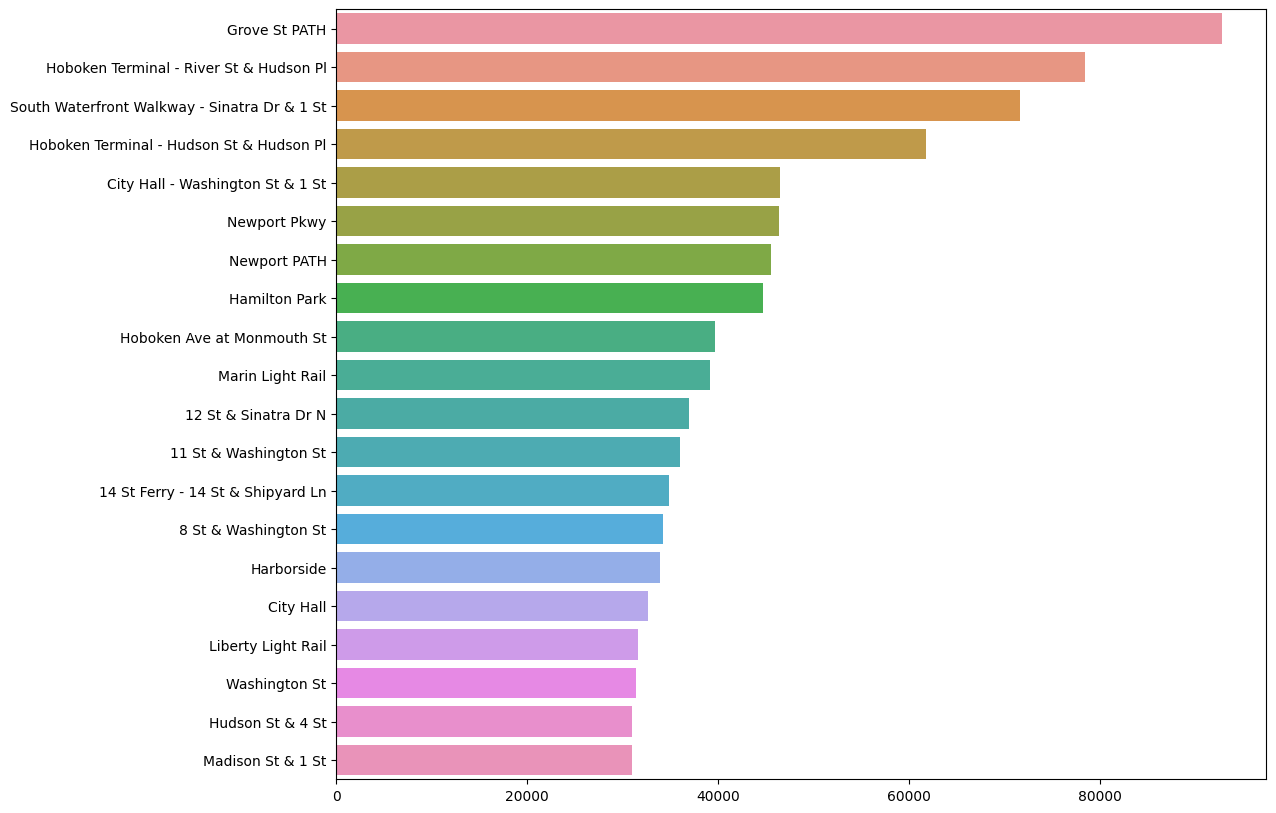

In [ ]:
startstation = df['start_station_name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index),
 orient="h");